In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('gold_data.csv')

In [4]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
data.shape

(2290, 6)

In [7]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

<AxesSubplot:>

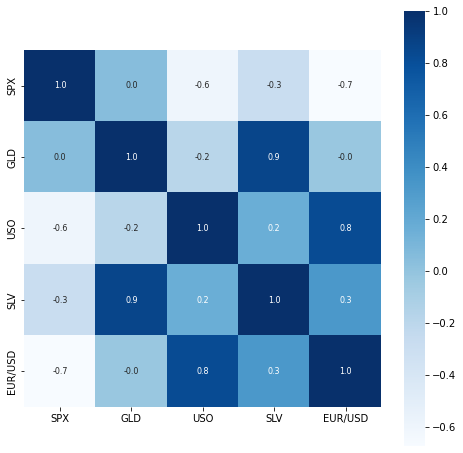

In [9]:
#Correlation
correlation = data.corr()

#heatmap
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')


In [10]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


c:\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

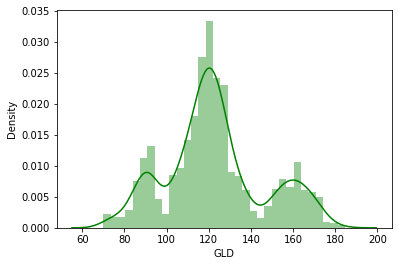

In [12]:
#GLD price distribution
sns.distplot(data['GLD'], color='green')

In [14]:
#Split Features and Target
X = data.drop(['Date', 'GLD'], axis=1)
Y = data['GLD']

In [15]:
#Split Train and test data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [16]:
rf_regressor = RandomForestRegressor(n_estimators=100)

In [19]:
#train model
rf_regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [22]:
#Model Evaluation
test_data_pred = rf_regressor.predict(x_test)

In [23]:
# R squared error
error_score = metrics.r2_score(y_test, test_data_pred)
print(' R square error: ', error_score)

 R square error:  0.9899737343647267


In [24]:
#Compare the actual values and predicted values
y_test = list(y_test)

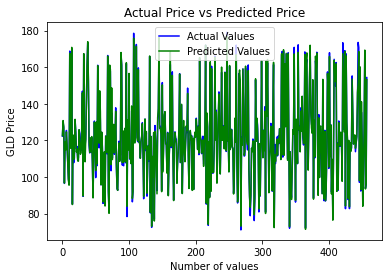

In [25]:
plt.plot(y_test, color='blue', label='Actual Values')
plt.plot(test_data_pred, color='green', label='Predicted Values')
plt.title('Actual Price vs Predicted Price')
plt.xlabel("Number of values")
plt.ylabel('GLD Price')
plt.legend()
plt.show()